#### Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, plot_confusion_matrix, classification_report, r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline

### Problem 1: Linear Regression

You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

##### 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA). Perform Univariate and Bivariate Analysis.

##### Read Data

In [2]:
zirc_df = pd.read_csv('cubic_zirconia-1.csv', index_col=0)
zirc_df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


##### Exploratory Data Analysis

In [3]:
zirc_df.shape

(26967, 10)

In [4]:
zirc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26967 entries, 1 to 26967
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.3+ MB


##### >>>> Describe Data

In [5]:
zirc_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,26967,NaN,NaN,NaN,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
cut,26967,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26270,NaN,NaN,NaN,61.7451,1.41286,50.8,61,61.8,62.5,73.6
table,26967,NaN,NaN,NaN,57.4561,2.23207,49,56,57,59,79
x,26967,NaN,NaN,NaN,5.72985,1.12852,0,4.71,5.69,6.55,10.23
y,26967,NaN,NaN,NaN,5.73357,1.16606,0,4.71,5.71,6.54,58.9
z,26967,NaN,NaN,NaN,3.53806,0.720624,0,2.9,3.52,4.04,31.8
price,26967,NaN,NaN,NaN,3939.52,4024.86,326,945,2375,5360,18818


In [6]:
zirc_df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [7]:
print("There are {} duplicated observations".format(zirc_df.duplicated().sum()))
print("Percentage of duplicates: ", round((34/26967)*100,2),'%')

There are 34 duplicated observations
Percentage of duplicates:  0.13 %


In [8]:
zirc_df.drop_duplicates(inplace=True)

In [9]:
print("There are now {} observations".format(zirc_df.shape[0]))

There are now 26933 observations


In [10]:
# 3 Object type, 7 Numeric type
# Some null values in 'depth' variable
# Unique values: cut = 5, color = 7, clarity = 8
# Most frequent - cut = Ideal (10816), color = G (5661), clarity = SI1 (6571)
# Value range for independent variables are different
# 75% of the obs. have 1.05 carat (weight) with 4.5 as max

##### Univariate Analysis

In [11]:
obj_cols = []; num_cols = []
for col in zirc_df.columns:
    if zirc_df[col].dtype.name == 'object':
        obj_cols.append(col)
    else:
        num_cols.append(col)

In [12]:
obj_cols, num_cols

(['cut', 'color', 'clarity'],
 ['carat', 'depth', 'table', 'x', 'y', 'z', 'price'])

In [13]:
# UNIVARIATE ANALYSIS FOR NUMERIC VARIABLES
def univariate_analysis_num(data_df):
    for col in num_cols:
        print(col.upper())
        
        fig, axes = plt.subplots(nrows=1, ncols=2)
        fig.set_size_inches(13,5)
        a = sns.boxplot(data_df[col], ax=axes[0])
        a.set_title('Boxplot')
        
        a = sns.distplot(data_df[col], ax=axes[1])
        a.set_title('Distribution plot')
        
        plt.show()
        print('\n---------------------------------------------------------------------------------------------')


In [14]:
# UNIVARIATE ANALYSIS FOR CATEGORICAL VARIABLES
def univariate_analysis_obj(data_df):
    for col in obj_cols:
        print(col.upper(),"\t Unique no of values:", data_df[col].nunique(),'\n')
        print(data_df[col].value_counts())
        
        sns.countplot(data_df[col], order=data_df[col].value_counts().index)
        plt.show()
        print('\n---------------------------------------------------------------------------------------------')

CARAT


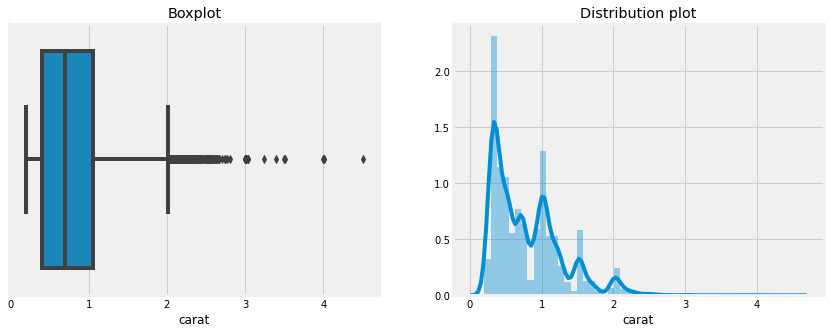


---------------------------------------------------------------------------------------------
DEPTH


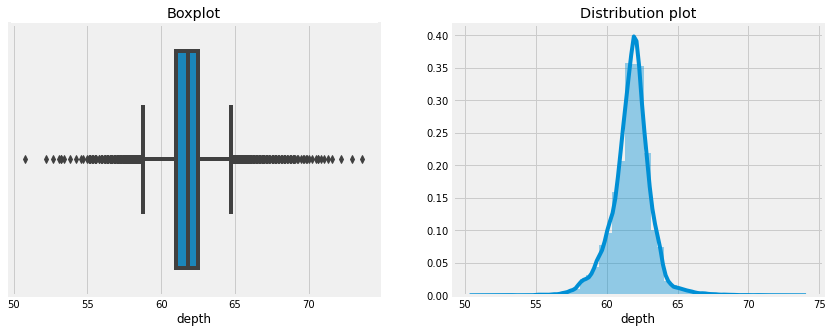


---------------------------------------------------------------------------------------------
TABLE


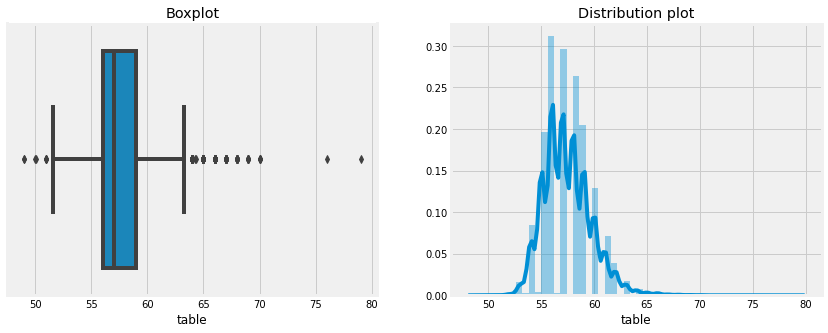


---------------------------------------------------------------------------------------------
X


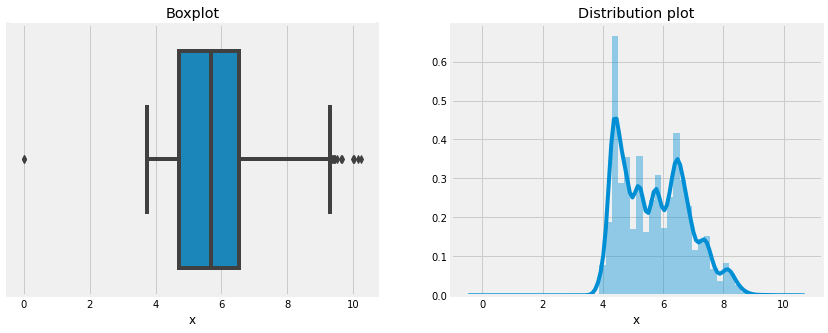


---------------------------------------------------------------------------------------------
Y


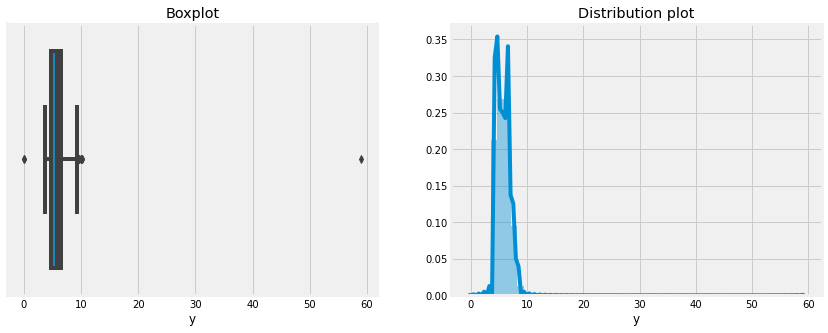


---------------------------------------------------------------------------------------------
Z


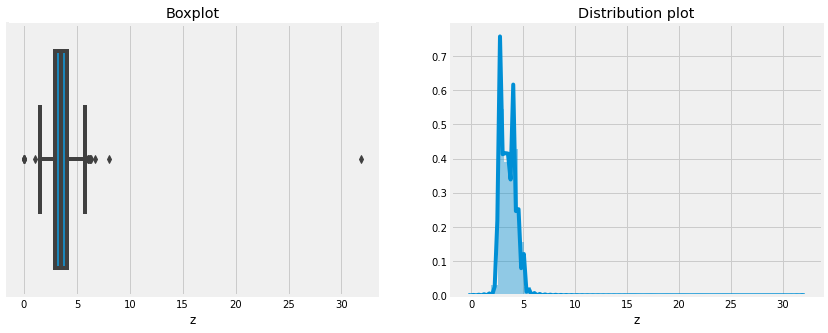


---------------------------------------------------------------------------------------------
PRICE


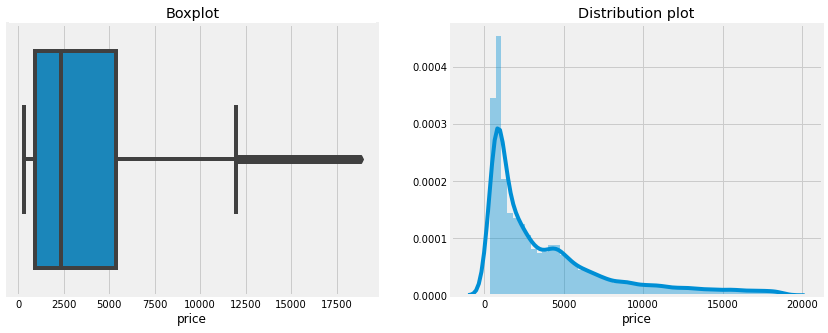


---------------------------------------------------------------------------------------------


In [15]:
univariate_analysis_num(zirc_df)

CUT 	 Unique no of values: 5 

Ideal        10805
Premium       6886
Very Good     6027
Good          2435
Fair           780
Name: cut, dtype: int64


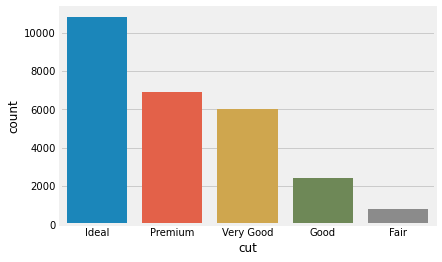


---------------------------------------------------------------------------------------------
COLOR 	 Unique no of values: 7 

G    5653
E    4916
F    4723
H    4095
D    3341
I    2765
J    1440
Name: color, dtype: int64


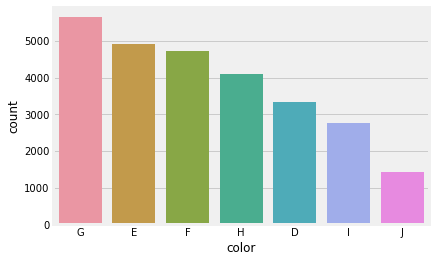


---------------------------------------------------------------------------------------------
CLARITY 	 Unique no of values: 8 

SI1     6565
VS2     6093
SI2     4564
VS1     4087
VVS2    2530
VVS1    1839
IF       891
I1       364
Name: clarity, dtype: int64


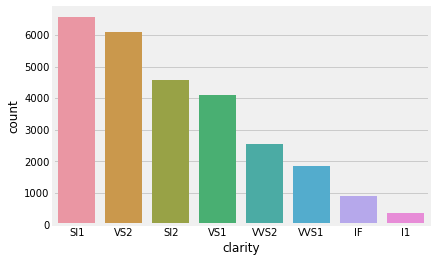


---------------------------------------------------------------------------------------------


In [16]:
univariate_analysis_obj(zirc_df)

##### Bivariate Analysis

In [17]:
def bivariate_analysis(data_df, target_col):
    if data_df[target_col].dtype.name != 'object':
        cols = obj_cols
    else:
        cols = num_cols
        
    for col in cols:
        print(col.upper())
        fig, axes = plt.subplots(nrows=1, ncols=2)
        fig.set_size_inches(15,5)
        
        a = sns.boxplot(x = col, y = target_col, data=data_df, ax=axes[0])
        a.set_title(str(col)+' vs.' + str(target_col) + ' Boxplot')
        
        a = sns.stripplot(x = col, y = target_col, data=data_df, ax=axes[1])
        a.set_title(str(col)+' vs.' + str(target_col) + ' Strip-plot')
        
        plt.show()
        print('\n---------------------------------------------------------------------------------------------')

CUT


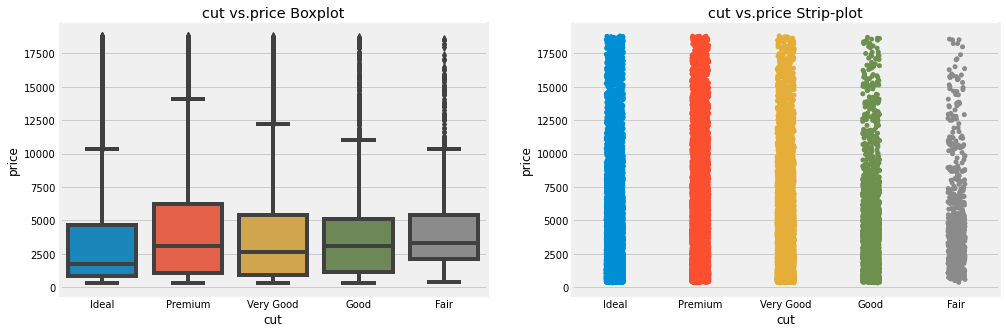


---------------------------------------------------------------------------------------------
COLOR


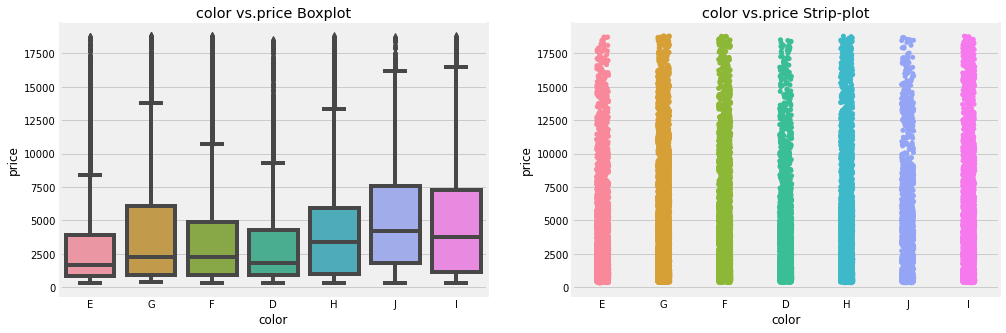


---------------------------------------------------------------------------------------------
CLARITY


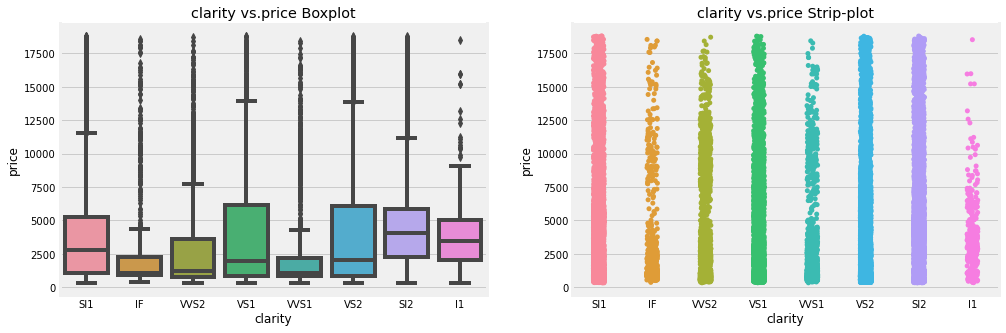


---------------------------------------------------------------------------------------------


In [18]:
bivariate_analysis(zirc_df, 'price')

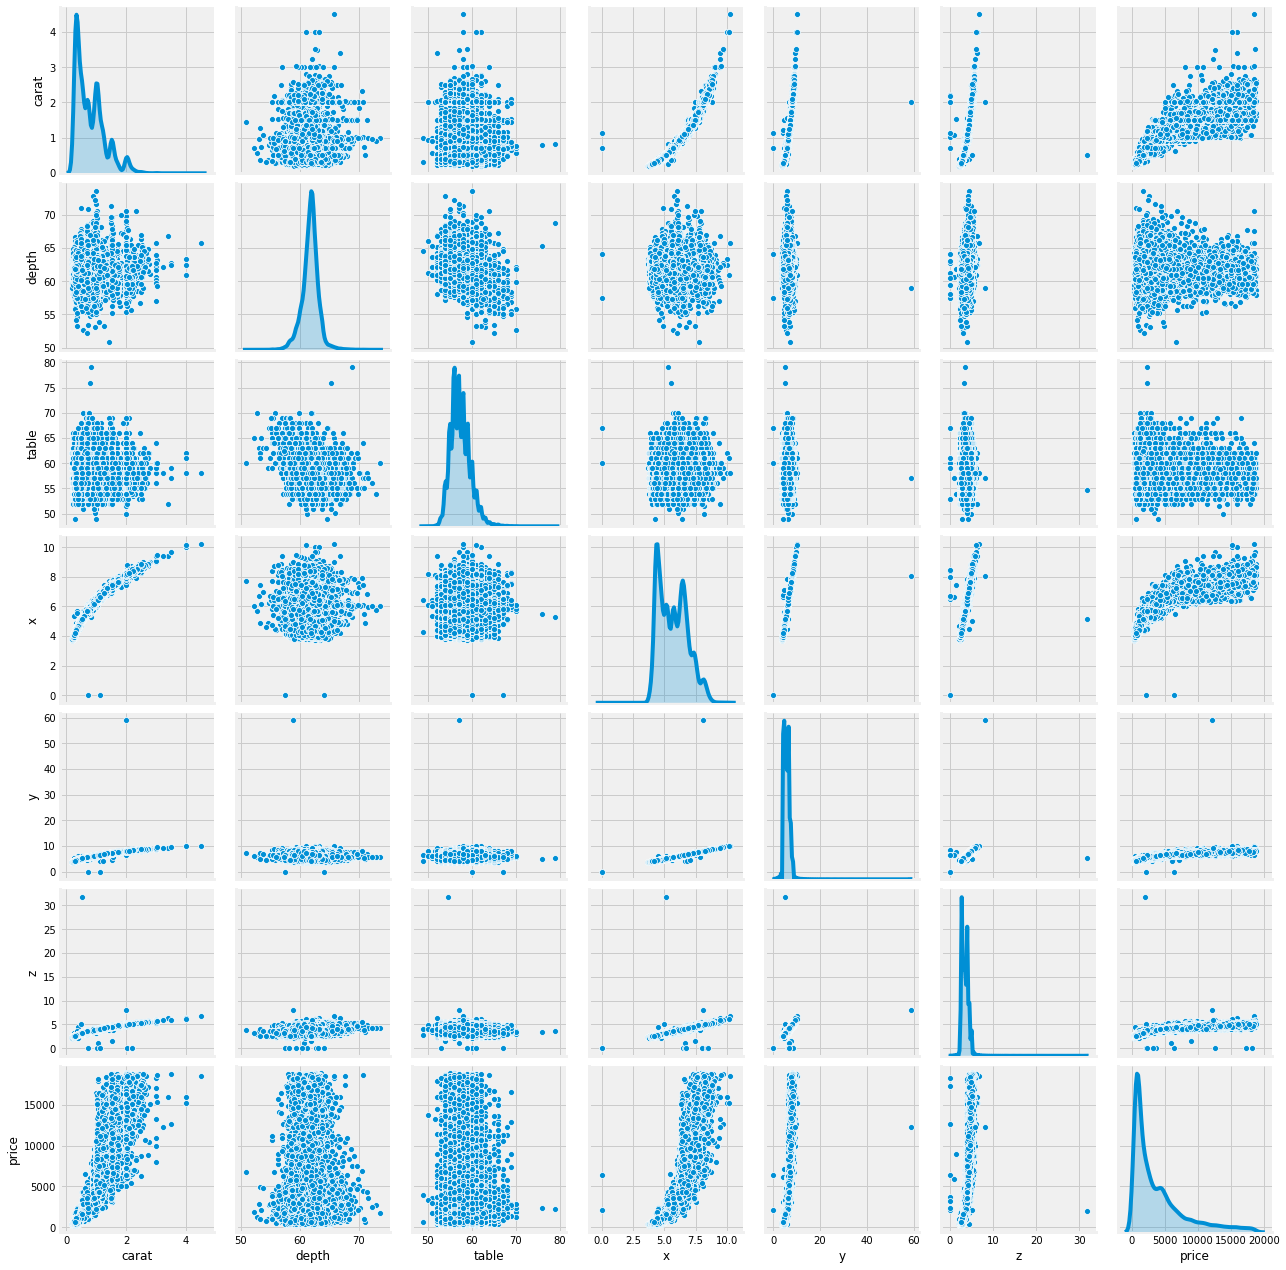

In [19]:
sns.pairplot(zirc_df, diag_kind='kde');

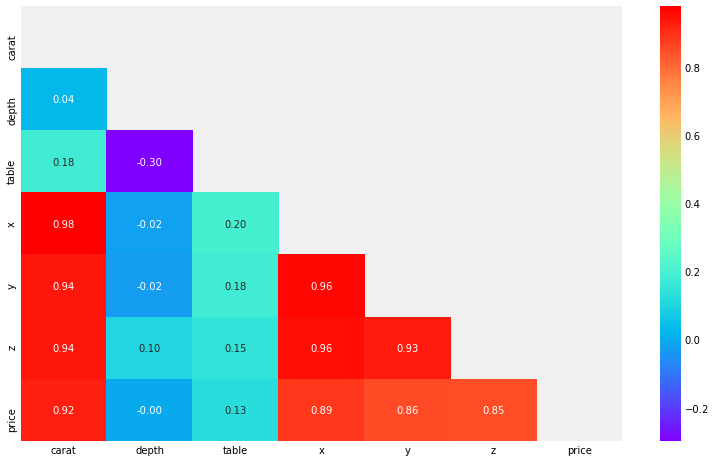

In [20]:
plt.figure(figsize=(12,8))
mask = np.triu(np.ones_like(zirc_df.corr(method='pearson')))
sns.heatmap(zirc_df.corr(), annot = True, fmt = '.2f', cmap = 'rainbow', mask = mask);

In [21]:
#CORRELATIONS 
def get_high_correlations(corr_df, thresh):
    corr_temp = pd.DataFrame(columns=['Variable1', 'Variable2', 'Correlation'])
    corr_final = pd.DataFrame(columns=['Variable1', 'Variable2', 'Correlation'])
    
    for i,j in zip(np.where(corr_df >= thresh)[0], np.where(corr_df >= thresh)[1]):    
        if i != j:
            corr_temp['Variable1'] = [corr_df.columns[i]]
            corr_temp['Variable2'] = [corr_df.columns[j]]
            corr_temp['Correlation'] = corr_df.iloc[i,j]
            corr_final = pd.concat([corr_final, corr_temp])
            
    corr_final = corr_final.drop_duplicates('Correlation')
    corr_final = corr_final.sort_values('Correlation', ascending=False)
    corr_final.index = np.arange(0,len(corr_final))
    return corr_final

In [22]:
thresh = 0.8
corr_df = get_high_correlations(zirc_df.corr(), thresh)
corr_df

,Variable1,Variable2,Correlation
0,carat,x,0.976858
1,x,y,0.962601
2,x,z,0.956490
3,carat,y,0.941442
4,carat,z,0.940982
5,y,z,0.928725
6,carat,price,0.922409
7,x,price,0.886554
8,y,price,0.856441
9,z,price,0.850682


##### Dropping 'depth' & 'table'

In [23]:
zirc_df.drop(['depth','table'], axis = 1, inplace=True)
zirc_df.head()

,carat,cut,color,clarity,x,y,z,price
1,0.30,Ideal,E,SI1,4.27,4.29,2.66,499
2,0.33,Premium,G,IF,4.42,4.46,2.70,984
3,0.90,Very Good,E,VVS2,6.04,6.12,3.78,6289
4,0.42,Ideal,F,VS1,4.82,4.80,2.96,1082
5,0.31,Ideal,F,VVS1,4.35,4.43,2.65,779


##### 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Do you think scaling is necessary in this case?

##### Check for null values

In [24]:
zirc_df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
x          0
y          0
z          0
price      0
dtype: int64

In [25]:
# x, y, z (length, width, height) as seen in describe() - having 0 makes no sense

In [26]:
zirc_df[(zirc_df['x'] == 0) | (zirc_df['y'] == 0) | (zirc_df['z'] == 0)]

,carat,cut,color,clarity,x,y,z,price
5822,0.71,Good,F,SI2,0.00,0.00,0.0,2130
6035,2.02,Premium,H,VS2,8.02,7.95,0.0,18207
10828,2.20,Premium,H,SI1,8.42,8.37,0.0,17265
12499,2.18,Premium,H,SI2,8.49,8.45,0.0,12631
12690,1.10,Premium,G,SI2,6.50,6.47,0.0,3696
17507,1.14,Fair,G,VS1,0.00,0.00,0.0,6381
18195,1.01,Premium,H,I1,6.66,6.60,0.0,3167
23759,1.12,Premium,G,I1,6.71,6.67,0.0,2383


In [27]:
# REPLACING 0's in x,y,z columns with NaN 

zirc_df1 = zirc_df.copy()
for col in ['x', 'y', 'z']:
    zirc_df1[col] = np.where(zirc_df1[col] == 0, np.nan, zirc_df1[col]) 

In [28]:
zirc_df1.isnull().sum()

carat      0
cut        0
color      0
clarity    0
x          2
y          2
z          8
price      0
dtype: int64

In [29]:
for col in ['x', 'y', 'z']:
    zirc_df1[col] = zirc_df1[col].fillna(zirc_df1[col].median())
zirc_df1.isnull().sum() 

carat      0
cut        0
color      0
clarity    0
x          0
y          0
z          0
price      0
dtype: int64

In [30]:
sc = StandardScaler()

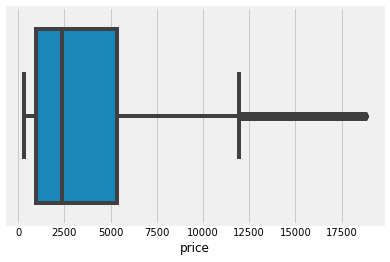

In [31]:
sns.boxplot(zirc_df1['price']);

In [32]:
zirc_df[zirc_df.price > 12500]

,carat,cut,color,clarity,x,y,z,price
45,2.00,Good,I,SI1,8.01,7.91,5.09,12554
63,1.80,Very Good,E,SI1,7.81,7.89,4.88,17273
103,1.69,Ideal,F,VS2,7.59,7.66,4.74,16789
123,1.68,Premium,F,SI1,7.72,7.66,4.67,12681
125,2.80,Premium,I,SI2,9.03,8.98,5.50,15030
...,...,...,...,...,...,...,...,...
26908,1.63,Very Good,G,VS1,7.43,7.51,4.67,14404
26916,2.00,Premium,J,VS2,8.12,8.09,4.93,13162
26925,2.03,Good,H,SI2,8.16,8.21,4.88,14720
26935,1.75,Ideal,I,SI1,7.67,7.71,4.75,13393


##### 1.3 Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using Rsquare, RMSE.

##### Mapping values to categorical variables

In [33]:
cut_mapping = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
color_mapping = {'D': 6,  'E': 5, 'F': 4, 'G': 3, 'H': 2, 'I': 1, 'J': 0}
# (In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
clarity_mapping = {'FL':8, 'IF':7, 'VVS1':6, 'VVS2':5, 'VS1':4, 'VS2':3, 'SI1':2, 'SI2':1, 'I1':0}

zirc_df1['cut'] = zirc_df1['cut'].replace(cut_mapping)
zirc_df1['color'] = zirc_df1['color'].replace(color_mapping)
zirc_df1['clarity'] = zirc_df1['clarity'].replace(clarity_mapping)

In [34]:
zirc_df1.head()

,carat,cut,color,clarity,x,y,z,price
1,0.30,4,5,2,4.27,4.29,2.66,499
2,0.33,3,3,7,4.42,4.46,2.70,984
3,0.90,2,5,5,6.04,6.12,3.78,6289
4,0.42,4,4,4,4.82,4.80,2.96,1082
5,0.31,4,4,6,4.35,4.43,2.65,779


##### Train Test Split

In [35]:
X = zirc_df1.drop(['price'], axis = 1)
y = zirc_df1['price']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=100)

In [37]:
X_train_scaled = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(sc.transform(X_test), columns=X_test.columns)

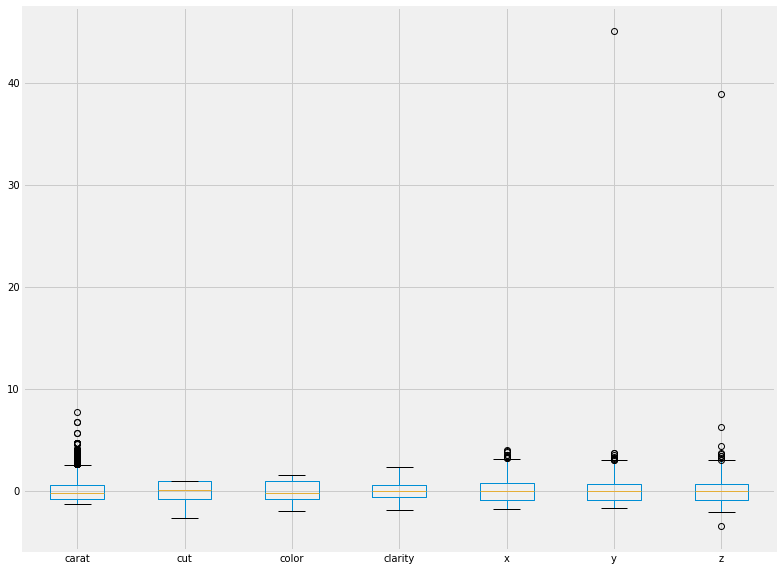

In [38]:
X_train_scaled.boxplot(figsize=(12,10));

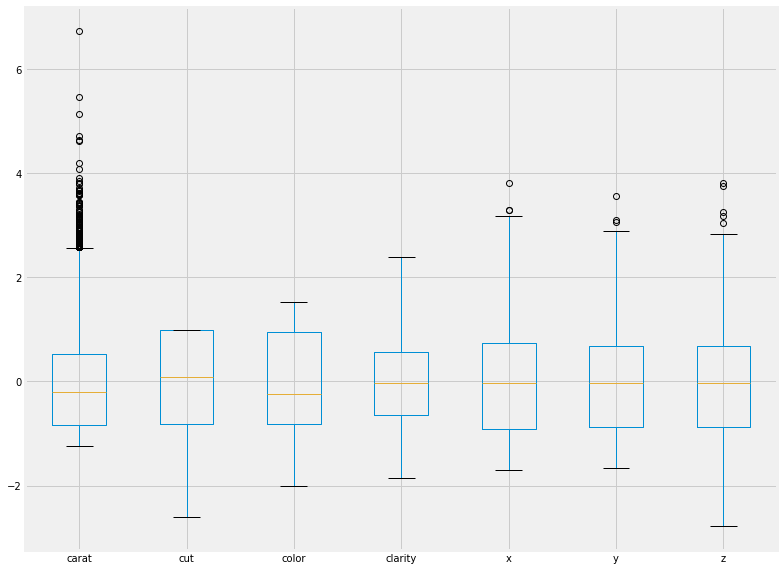

In [39]:
X_test_scaled.boxplot(figsize=(12,10));

#####  Building Linear Regression Model

In [40]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

#### Accuracy Metrics

In [41]:
y_train_predict = linear_model.predict(X_train_scaled)
y_test_predict = linear_model.predict(X_test_scaled)

In [42]:
##### Score
linear_model.score(X_train_scaled, y_train)

0.9070122210883091

In [43]:
linear_model.score(X_test_scaled, y_test)

0.9101391934890697

In [44]:
#### R-Square
print("R Squared for Train\t:", r2_score(y_train, y_train_predict))
print("R Squared for Test\t:", r2_score(y_test, y_test_predict))

R Squared for Train	: 0.9070122210883091
R Squared for Test	: 0.9101391934890697


In [45]:
r2_train = r2_score(y_train, y_train_predict)
r2_test = r2_score(y_test, y_test_predict)
n = X_test_scaled.shape[0]      #no of rows
k = X_test_scaled.shape[1]      # no of cols

adj_r2_train = 1 - (((1-r2_train)*(n-1))/(n-k-1))
adj_r2_test = 1 - (((1-r2_test)*(n-1))/(n-k-1))
print("Adjusted R-Square Train:\t",adj_r2_train)
print("Adjusted R-Square Test:\t",adj_r2_test)

Adjusted R-Square Train:	 0.906931582528797
Adjusted R-Square Test:	 0.910061266625148


In [46]:
#### RMSE Square

In [47]:
print("RMSE for Train\t:", np.sqrt(mean_squared_error(y_train, y_train_predict)))
print("RMSE for Test\t:", np.sqrt(mean_squared_error(y_test, y_test_predict)))

RMSE for Train	: 1225.3485521615323
RMSE for Test	: 1208.6981738035713


##### 1.4 Inference: Basis on these predictions, what are the business insights and recommendations.

In [48]:
linear_model.coef_

array([5103.20717455,  181.00675749,  569.9705554 ,  836.48441218,
       -840.06684545,   40.20031948, -137.19538844])

In [49]:
for i, col in enumerate(zirc_df1.columns[:-1]):
    print('(',round(linear_model.coef_[i],2),'*',col, ') + ', end = ' ')

( 5103.21 * carat ) +  ( 181.01 * cut ) +  ( 569.97 * color ) +  ( 836.48 * clarity ) +  ( -840.07 * x ) +  ( 40.2 * y ) +  ( -137.2 * z ) +  

In [50]:
sorted(abs(linear_model.coef_), reverse=True)

[5103.207174549172,
 840.0668454499059,
 836.4844121842895,
 569.9705554047043,
 181.00675748961524,
 137.1953884389623,
 40.20031947805766]

In [51]:
#carat, x, clarity, color, cut

### Problem 2: Logistic Regression and LDA


You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

##### 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

##### Read Data

In [52]:
holiday_df = pd.read_csv('Holiday_Package-1.csv', index_col=0)
holiday_df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
1,no,48412,30,8,1,1,no
2,yes,37207,45,8,0,1,no
3,no,58022,46,9,0,0,no
4,no,66503,31,11,2,0,no
5,no,66734,44,12,0,2,no


##### Basic data check

In [53]:
holiday_df.shape

(872, 7)

In [54]:
holiday_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 872 entries, 1 to 872
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 54.5+ KB


In [55]:
holiday_df.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [56]:
holiday_df.duplicated().sum()

0

##### Descriptive Statistics

In [57]:
holiday_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Holliday_Package,872,2,no,471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,872,NaN,NaN,NaN,47729.2,23418.7,1322,35324,41903.5,53469.5,236961
age,872,NaN,NaN,NaN,39.9553,10.5517,20,32,39,48,62
educ,872,NaN,NaN,NaN,9.30734,3.03626,1,8,9,12,21
no_young_children,872,NaN,NaN,NaN,0.311927,0.61287,0,0,0,0,3
no_older_children,872,NaN,NaN,NaN,0.982798,1.08679,0,0,1,2,6
foreign,872,2,no,656,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
# most 75% - middle aged people in their 40's, max 62
# 75% - 2 children, max 6
# salary - very low as 1322, most-53469.5

##### Univariate Analysis

In [59]:
obj_cols = []; num_cols = []
for col in holiday_df.columns:
    if holiday_df[col].dtype.name == 'object':
        obj_cols.append(col)
    else:num_cols.append(col)

In [60]:
obj_cols, num_cols

(['Holliday_Package', 'foreign'],
 ['Salary', 'age', 'educ', 'no_young_children', 'no_older_children'])

SALARY


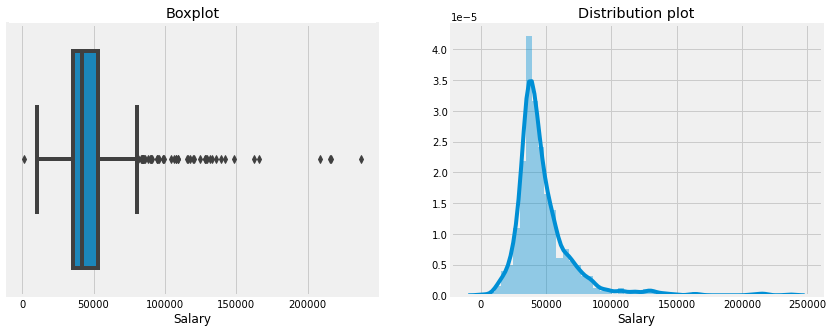


---------------------------------------------------------------------------------------------
AGE


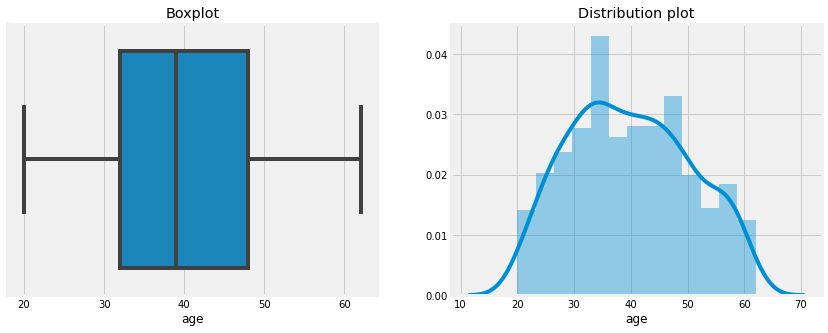


---------------------------------------------------------------------------------------------
EDUC


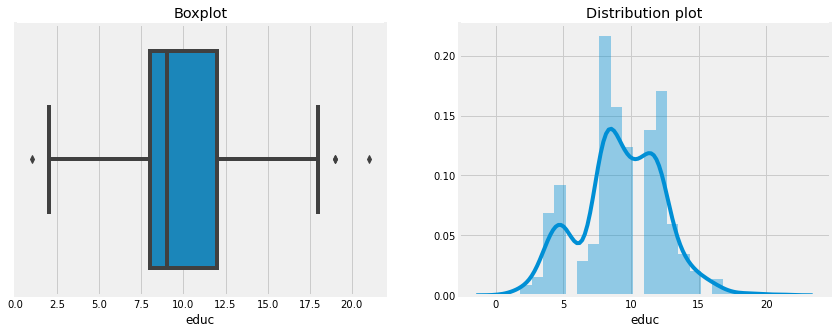


---------------------------------------------------------------------------------------------
NO_YOUNG_CHILDREN


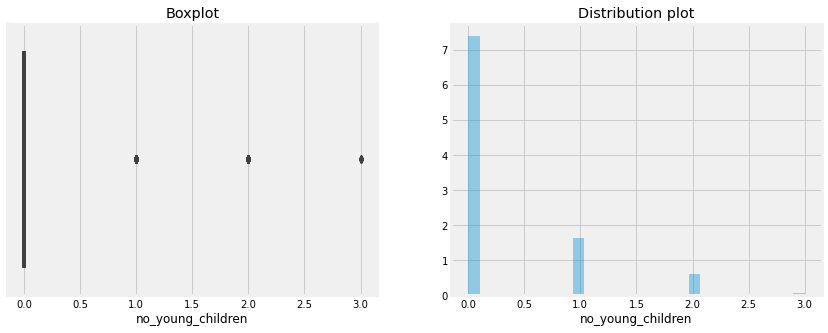


---------------------------------------------------------------------------------------------
NO_OLDER_CHILDREN


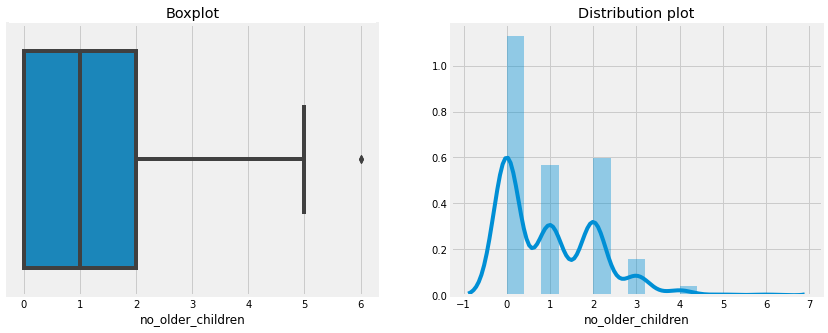


---------------------------------------------------------------------------------------------


In [61]:
univariate_analysis_num(holiday_df)

Numeric Discrete Variable analysis:
---------------------------------------
NO_YOUNG_CHILDREN 	Unique: 4
0    665
1    147
2     55
3      5
Name: no_young_children, dtype: int64 



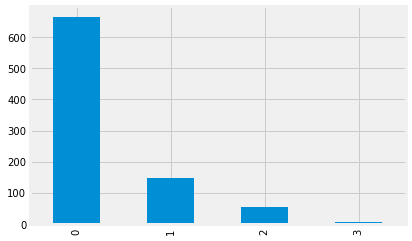

NO_OLDER_CHILDREN 	Unique: 7
0    393
2    208
1    198
3     55
4     14
6      2
5      2
Name: no_older_children, dtype: int64 



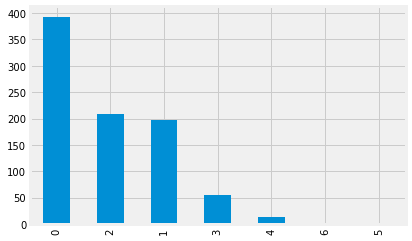

In [62]:
print("Numeric Discrete Variable analysis:\n---------------------------------------")
for col in num_cols[-2:]:
    print(col.upper(), '\tUnique:', holiday_df[col].nunique())
    print(holiday_df[col].value_counts(), '\n')
    holiday_df[col].value_counts().plot(kind='bar')
    plt.show()

HOLLIDAY_PACKAGE 	 Unique no of values: 2 

no     471
yes    401
Name: Holliday_Package, dtype: int64


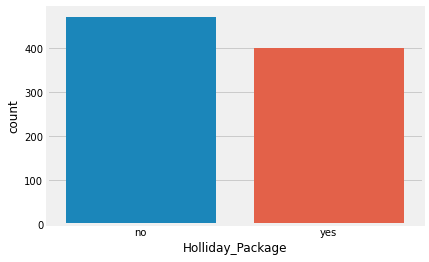


---------------------------------------------------------------------------------------------
FOREIGN 	 Unique no of values: 2 

no     656
yes    216
Name: foreign, dtype: int64


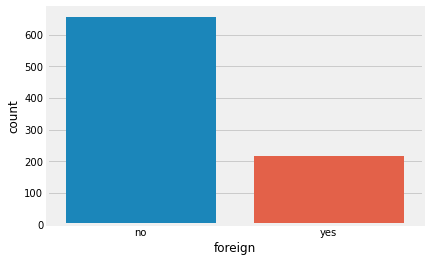


---------------------------------------------------------------------------------------------


In [63]:
univariate_analysis_obj(holiday_df)

##### Bivariate Analysis

SALARY


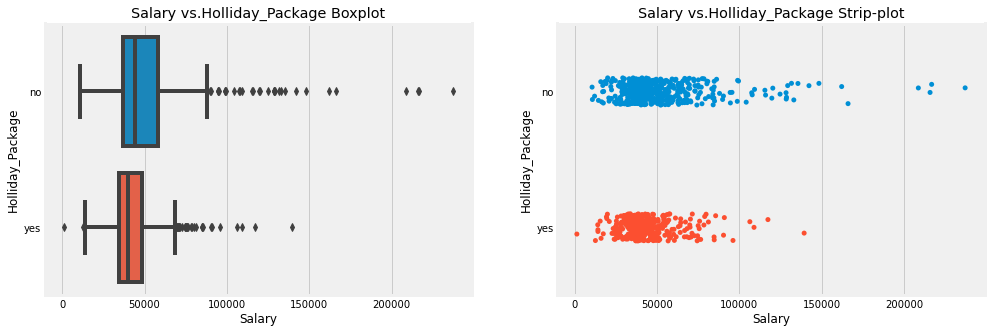


---------------------------------------------------------------------------------------------
AGE


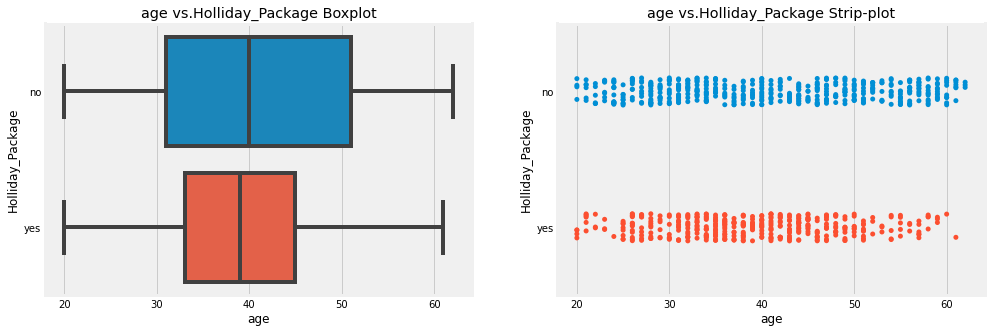


---------------------------------------------------------------------------------------------
EDUC


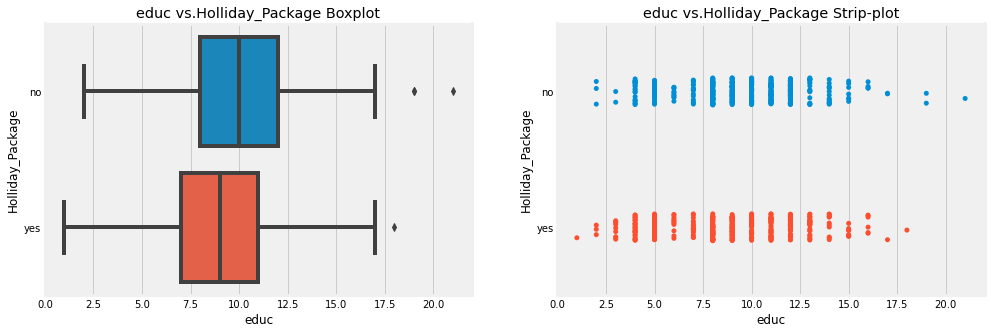


---------------------------------------------------------------------------------------------
NO_YOUNG_CHILDREN


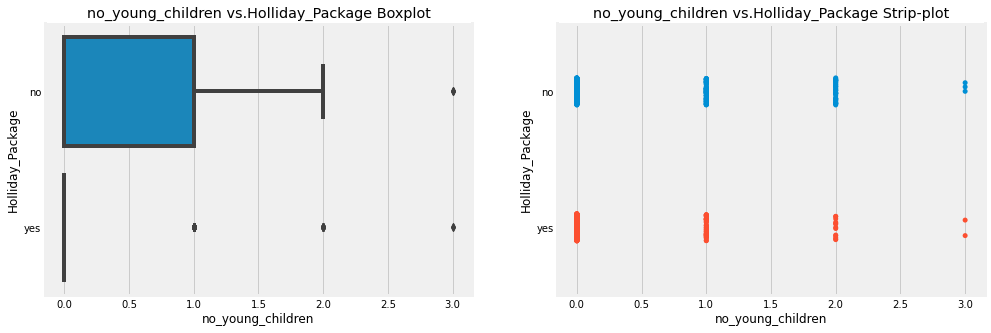


---------------------------------------------------------------------------------------------
NO_OLDER_CHILDREN


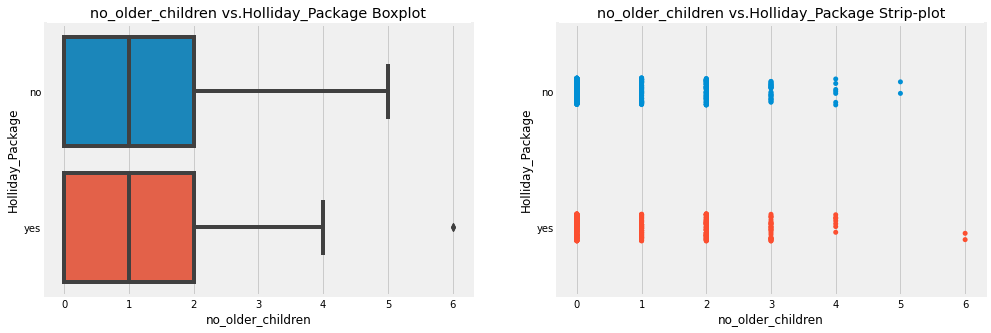


---------------------------------------------------------------------------------------------


In [64]:
bivariate_analysis(holiday_df, 'Holliday_Package')

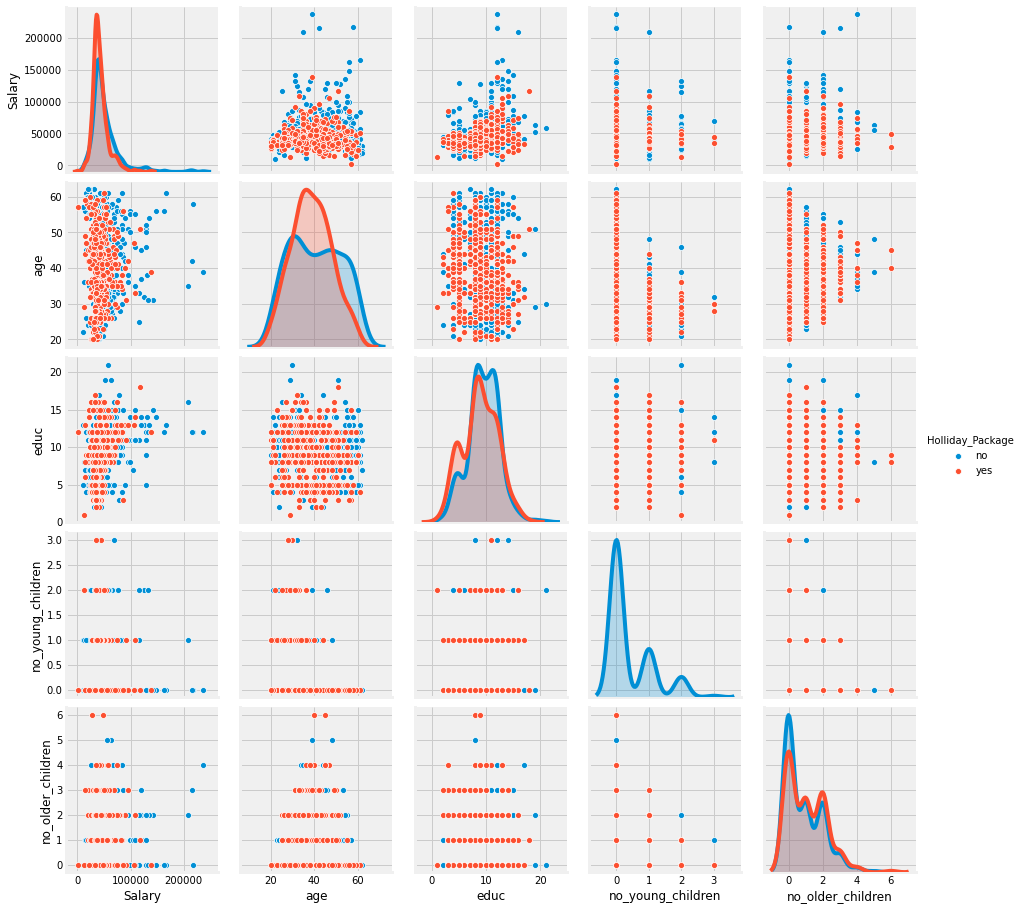

In [65]:
sns.pairplot(holiday_df, hue = 'Holliday_Package');

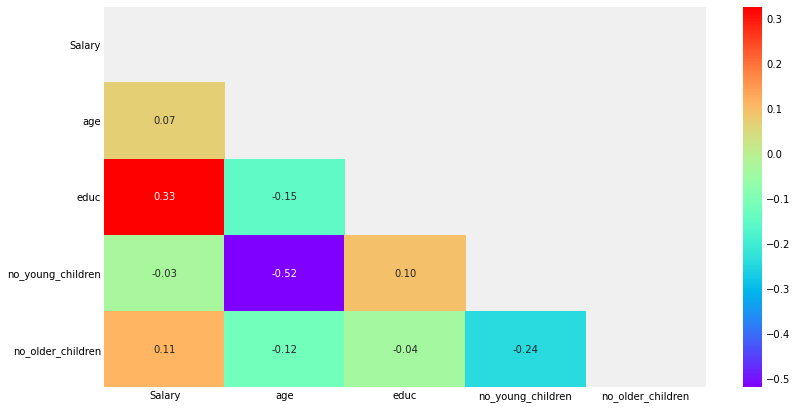

In [66]:
plt.figure(figsize=(12,7))
mask = np.triu(np.ones_like(holiday_df.corr(method='pearson')))
sns.heatmap(holiday_df.corr(), mask = mask, annot = True, fmt = '.2f', cmap = 'rainbow');

##### 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

#### Encoding String values

In [67]:
obj_cols

['Holliday_Package', 'foreign']

In [68]:
holiday_df1 = holiday_df.copy()
for col in obj_cols:
    holiday_df1[col] = pd.Categorical(holiday_df1[col]).codes
holiday_df1.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
1,0,48412,30,8,1,1,0
2,1,37207,45,8,0,1,0
3,0,58022,46,9,0,0,0
4,0,66503,31,11,2,0,0
5,0,66734,44,12,0,2,0


#### Data Split

In [69]:
X = holiday_df1.drop(['Holliday_Package'], axis = 1)
y = holiday_df1['Holliday_Package']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=100)

##### Scaling

In [71]:
sc = StandardScaler()

##### Logistic Regression

In [72]:
params_lg = { 'penalty': ['none', 'l1','l2'],
              'solver': ['newton-cg', 'lbfgs', 'liblinear'],
              'max_iter' : [10000],
              'tol': [0.000000001, 0.000001, 0.0001, 0.01]
            }

In [73]:
rv_search = RandomizedSearchCV(LogisticRegression(), params_lg, cv = 5, scoring='accuracy', n_jobs=5)
rv_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=5,
                   param_distributions={'max_iter': [10000],
                                        'penalty': ['none', 'l1', 'l2'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear'],
                                        'tol': [1e-09, 1e-06, 0.0001, 0.01]},
                   scoring='accuracy')

In [74]:
rv_search.best_estimator_

LogisticRegression(max_iter=10000, solver='newton-cg', tol=1e-06)

In [75]:
rv_search.best_params_

{'tol': 1e-06, 'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 10000}

In [76]:
rv_search.best_score_

0.660655737704918

In [77]:
best_lg_model = rv_search.best_estimator_

##### Linear Discriminant Analysis

In [78]:
params_lda = { 'solver': ['svd', 'lsqr', 'eigen'],
               'tol': [0.000000001, 0.000001, 0.0001, 0.01]
            }

In [79]:
rv_search1 = RandomizedSearchCV(LinearDiscriminantAnalysis(), params_lda, scoring='accuracy', cv = 5, n_jobs=5)
rv_search1.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LinearDiscriminantAnalysis(), n_jobs=5,
                   param_distributions={'solver': ['svd', 'lsqr', 'eigen'],
                                        'tol': [1e-09, 1e-06, 0.0001, 0.01]},
                   scoring='accuracy')

In [80]:
rv_search1.best_estimator_

LinearDiscriminantAnalysis(solver='eigen', tol=1e-06)

In [99]:
rv_search1.best_params_

{'tol': 1e-06, 'solver': 'eigen'}

In [81]:
rv_search1.best_score_

0.6491803278688524

In [82]:
best_lda_model = rv_search1.best_estimator_

##### 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

In [83]:
# LOGISTIC REGRESSION PREDICTIONS
y_train_predict_lg = best_lg_model.predict(X_train)
y_test_predict_lg = best_lg_model.predict(X_test)

# Probabilites
y_train_predict_prob_lg = best_lg_model.predict_proba(X_train)[:,1]
y_test_predict_prob_lg = best_lg_model.predict_proba(X_test)[:,1]

In [84]:
# LDA PREDICTIONS
y_train_predict_lda = best_lda_model.predict(X_train)
y_test_predict_lda = best_lda_model.predict(X_test)

# Probabilites
y_train_predict_prob_lda = best_lda_model.predict_proba(X_train)[:,1]
y_test_predict_prob_lda = best_lda_model.predict_proba(X_test)[:,1]

In [85]:
acc_train = []; acc_test = []
f1_train = []; f1_test = []
auc_train = []; auc_test = []
model_names = ['Logistic Regression', 'Linear Discriminant Analysis']
models = [best_lg_model, best_lda_model]

In [86]:
def get_performance_metrics(model_names, pred_set, pred_prob_set, y_data):
    
    accuracy = []; f1_score=[]; auc_score = []
    
    for name, pred, pred_prob in zip(model_names, pred_set, pred_prob_set):
        print(name.upper(),"\n\nClassification Report\n")
        report = classification_report(y_data, pred, output_dict=True)
        accuracy.append(report['accuracy'])
        print("Accuracy:\t", round(report['accuracy']*100,2), '%\n')
        f1_score.append(report['1']['f1-score'])
        auc_score.append(roc_auc_score(y_data, pred_prob))
        print(classification_report(y_data, pred))
        print("\nConfusion Matrix\n")
        sns.heatmap(confusion_matrix(y_data, pred), annot=True, fmt='d')
        plt.show()
        print("-------------------------------------------------------------------------------------------------------")
        
    print("ROC AUC Curve:\n")
    plt.figure(figsize=(12,10))
    for name, pred_prob in zip(model_names, pred_prob_set):
        print('AUC Score',name.ljust(40), roc_auc_score(y_data, pred_prob))
        fpr, tpr, thresh = roc_curve(y_data, pred_prob)
        plt.plot([0,1],[0,1], linestyle = '--')
        plt.plot(fpr, tpr, alpha = 0.5, label = name)
        plt.legend(loc='best')
        
         
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()   
    
    return accuracy, f1_score, auc_score

####  PERFORMANCE ON TRAIN SET:

LOGISTIC REGRESSION 

Classification Report

Accuracy:	 67.05 %

              precision    recall  f1-score   support

           0       0.67      0.77      0.72       332
           1       0.67      0.55      0.60       278

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.67       610


Confusion Matrix



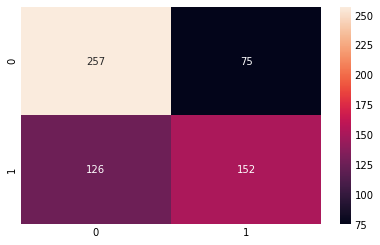

-------------------------------------------------------------------------------------------------------
LINEAR DISCRIMINANT ANALYSIS 

Classification Report

Accuracy:	 66.56 %

              precision    recall  f1-score   support

           0       0.67      0.77      0.71       332
           1       0.66      0.54      0.60       278

    accuracy                           0.67       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.67      0.67      0.66       610


Confusion Matrix



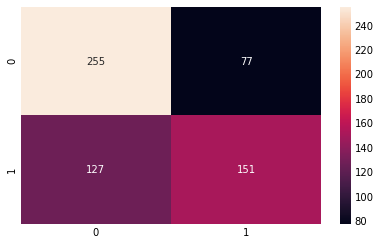

-------------------------------------------------------------------------------------------------------
ROC AUC Curve:

AUC Score Logistic Regression                      0.7221873103926497
AUC Score Linear Discriminant Analysis             0.7210713357025224


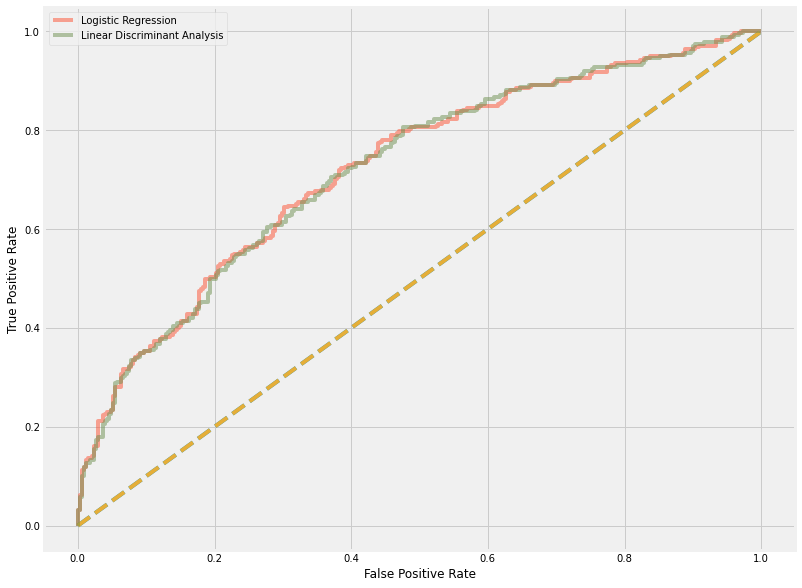

In [87]:
pred_set = [y_train_predict_lg, y_train_predict_lda]
pred_prob_set = [y_train_predict_prob_lg, y_train_predict_prob_lda]
acc_train, f1_train, auc_train = get_performance_metrics(model_names, pred_set, pred_prob_set, y_train)

####  PERFORMANCE ON TEST SET:

LOGISTIC REGRESSION 

Classification Report

Accuracy:	 66.41 %

              precision    recall  f1-score   support

           0       0.65      0.78      0.71       139
           1       0.68      0.53      0.60       123

    accuracy                           0.66       262
   macro avg       0.67      0.66      0.65       262
weighted avg       0.67      0.66      0.66       262


Confusion Matrix



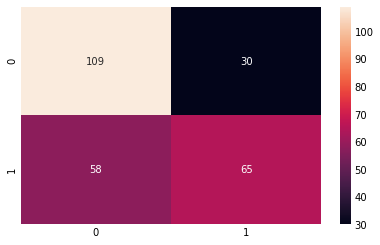

-------------------------------------------------------------------------------------------------------
LINEAR DISCRIMINANT ANALYSIS 

Classification Report

Accuracy:	 66.03 %

              precision    recall  f1-score   support

           0       0.65      0.79      0.71       139
           1       0.68      0.51      0.59       123

    accuracy                           0.66       262
   macro avg       0.67      0.65      0.65       262
weighted avg       0.66      0.66      0.65       262


Confusion Matrix



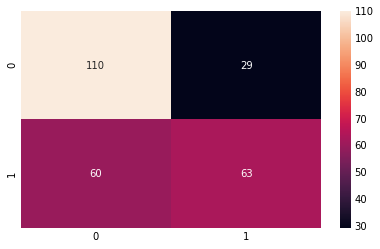

-------------------------------------------------------------------------------------------------------
ROC AUC Curve:

AUC Score Logistic Regression                      0.7477335205006727
AUC Score Linear Discriminant Analysis             0.7459203369012107


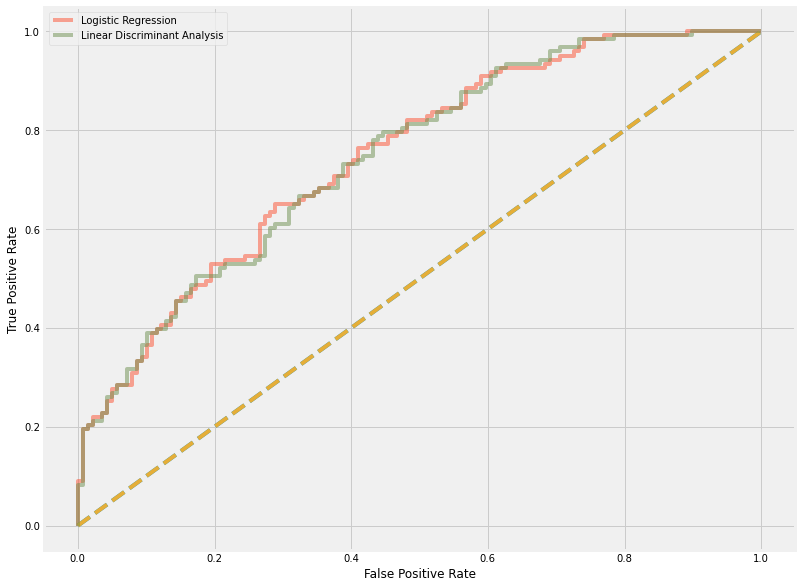

In [88]:
pred_set = [y_test_predict_lg, y_test_predict_lda]
pred_prob_set = [y_test_predict_prob_lg, y_test_predict_prob_lda]
acc_test, f1_test, auc_test = get_performance_metrics(model_names, pred_set, pred_prob_set, y_test)

##### >>> Comparison of model performance

In [90]:
metrics_df = pd.DataFrame([np.round([i*100 for i in acc_train],2), np.round([i*100 for i in acc_test],2), 
                            np.round([i*100 for i in f1_train],2),  np.round([i*100 for i in f1_test],2),
                            np.round([i*100 for i in auc_train],2), np.round([i*100 for i in auc_test],2)],                                        
                            columns=model_names,
                            index = ['Accuracy_Train', 'Accuracy_Test', 'F1_score_Train', 'F1_score_Test', 
                                    'AUC_Score_Train', 'AUC_Score_Test'])
metrics_df

,Logistic Regression,Linear Discriminant Analysis
Accuracy_Train,67.05,66.56
Accuracy_Test,66.41,66.03
F1_score_Train,60.20,59.68
F1_score_Test,59.63,58.60
AUC_Score_Train,72.22,72.11
AUC_Score_Test,74.77,74.59


#### 2.4 Inference: Basis on these predictions, what are the insights and recommendations.Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.

In [93]:
best_lg_model.coef_

array([[-1.66227726e-05, -4.91605011e-02,  3.16591859e-02,
        -1.10662339e+00,  1.91840760e-02,  1.15393322e+00]])

In [100]:
best_lg_model.coef_[0]

array([-1.66227726e-05, -4.91605011e-02,  3.16591859e-02, -1.10662339e+00,
        1.91840760e-02,  1.15393322e+00])

In [94]:
best_lg_model.coef_[0,1]

-0.04916050111605417

In [95]:
for i, col in enumerate(holiday_df1.columns[1:]):
    print('(',np.round(best_lg_model.coef_[0,i],2),'*',col,') + ',end = '')

( -0.0 * Salary ) + ( -0.05 * age ) + ( 0.03 * educ ) + ( -1.11 * no_young_children ) + ( 0.02 * no_older_children ) + ( 1.15 * foreign ) + 

In [96]:
sorted(abs(best_lg_model.coef_[0]), reverse=True)

[1.1539332187545734,
 1.1066233865987511,
 0.04916050111605417,
 0.031659185910782726,
 0.019184075957372766,
 1.662277255088372e-05]

In [ ]:
# foreign, no_young_children, age, education